<a href="https://colab.research.google.com/github/faroquehassan/git_test/blob/main/hw_6_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv


--2023-10-22 15:06:36--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.01s   

2023-10-22 15:06:36 (131 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [4]:
df = pd.read_csv('housing.csv')

In [23]:
df = df[df['ocean_proximity'].isin(["<1H OCEAN","INLAND"])]

In [24]:
df.fillna(0,inplace=True)

In [27]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [29]:
df['median_house_value'] = np.log1p(df['median_house_value'])

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
df_full_train, df_test = train_test_split(df, test_size = 0.2,random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state =1)

In [36]:
df_train.reset_index(drop=True,inplace=True)
df_val.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

del df_train['median_house_value']
del df_test['median_house_value']
del df_val['median_house_value']

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [39]:
dv = DictVectorizer(sparse = True)

In [41]:
train_dicts = df_train.to_dict(orient='records')

In [43]:
X_train = dv.fit_transform(train_dicts)

In [47]:
dt = DecisionTreeRegressor(max_depth = 1)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=1)

In [48]:
from sklearn.tree import export_text

In [49]:
print(export_text(dt, feature_names = list(dv.get_feature_names_out())))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



In [50]:
#Q1 - ocean_proximity

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rf = RandomForestRegressor(n_estimators=10, random_state=1,n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [60]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = rf.predict(X_val)

In [62]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val,y_pred)
np.sqrt(mse)

0.24495290030597147

In [63]:
#Q2 - 0.245 is RMSE

In [64]:
scores = []

In [67]:
for i in range(10,201,10):
  rf = RandomForestRegressor(n_estimators=i, random_state=1,n_jobs=-1)
  rf.fit(X_train,y_train)
  y_pred = rf.predict(X_val)

  mse = mean_squared_error(y_val,y_pred)
  rmse = np.sqrt(mse)
  scores.append((i, rmse))

In [70]:
df_scores = pd.DataFrame(scores, columns = (['i','rmse']))

In [71]:
import seaborn as sns

<Axes: >

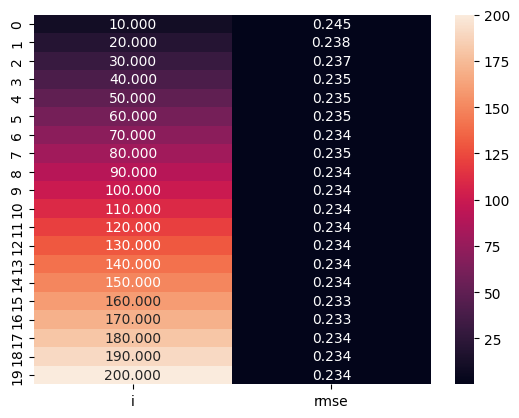

In [73]:
sns.heatmap(df_scores,annot=True, fmt='.3f')

In [ ]:
#Q3 - n_estimators = 160, rmse stops improving

In [74]:
scores = []

In [ ]:
for i in (10,15,20,25):
  for j in range(10,201,10):
    print("d:", i," n:",j)
    rf = RandomForestRegressor(max_depth = i, n_estimators=j, random_state=1,n_jobs=-1)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_val)

    mse = mean_squared_error(y_val,y_pred)
    rmse = np.sqrt(mse)
    scores.append((i,j,rmse))
    print("rmse: ",rmse)

d: 10  n: 10
rmse:  0.250682176668064
d: 10  n: 20
rmse:  0.24745502781785716
d: 10  n: 30
rmse:  0.24626379186617842
d: 10  n: 40
rmse:  0.24502936288687294
d: 10  n: 50
rmse:  0.24543003121441526
d: 10  n: 60
rmse:  0.24522113262934922
d: 10  n: 70
rmse:  0.24528983725642312
d: 10  n: 80
rmse:  0.24553630580063834
d: 10  n: 90
rmse:  0.2454521292171777
d: 10  n: 100
rmse:  0.24537002577206934
d: 10  n: 110
rmse:  0.24526239970363065
d: 10  n: 120
rmse:  0.24505304321886626
d: 10  n: 130
rmse:  0.2447899181250307
d: 10  n: 140
rmse:  0.24457214573772543
d: 10  n: 150
rmse:  0.24455351098981432
d: 10  n: 160
rmse:  0.24445890373792142
d: 10  n: 170
rmse:  0.24441806155085397
d: 10  n: 180
rmse:  0.24452331688334136
d: 10  n: 190
rmse:  0.24471986806235063
d: 10  n: 200
rmse:  0.24472926841080211
d: 15  n: 10
rmse:  0.24572727111119222
d: 15  n: 20
rmse:  0.2395288101057743
d: 15  n: 30
rmse:  0.2378130659762502
d: 15  n: 40
rmse:  0.23590339688070872
d: 15  n: 50
rmse:  0.2359295181428

In [ ]:
df_scores = pd.DataFrame(scores, columns = (['i','j','rmse']))
df_scores.groupby(df_scores['i']).mean().sort_values(by='rmse',ascending=True)

In [ ]:
#Q4 - max_depth 25

In [ ]:
rf = RandomForestRegressor(max_depth = 20, n_estimators=10, random_state=1,n_jobs=-1)
rf.fit(X_train,y_train)

feat_importances = pd.Series(rf.feature_importances_, index=list(dv.get_feature_names_out()))

In [ ]:
feat_importances.sort_values(ascending=False)

In [ ]:
#Q5 - Median Income is the most important feature

In [ ]:
import xgboost as xgb

In [ ]:
list(dv.get_feature_names_out())

In [ ]:
features = list(dv.get_feature_names_out())
features[5] = 'ocean_proximity=1H OCEAN'
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names = features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names = features)

In [ ]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

watchlist = [(dtrain, 'train'), (dval,'val')]

In [ ]:
%%capture output
model = xgb.train(xgb_params,dtrain, evals = watchlist,num_boost_round=100)

In [ ]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [ ]:
eta03_score = parse_xgb_output(output)
eta03_score

In [ ]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

In [ ]:
%%capture output
model = xgb.train(xgb_params,dtrain, evals = watchlist,num_boost_round=100)

In [ ]:
eta01_score = parse_xgb_output(output)
eta01_score

In [ ]:
#Q6 -ETA 0.3, is better